In [2]:
import numpy as np

def inverse_kinematics_rrr_wrist(x, y, z, d1=10, a2=15, a3=10):
    # Paso 1: Ángulo base θ1
    theta1 = np.arctan2(y, x)

    # Paso 2: Coordenadas del plano del brazo
    r = np.sqrt(x**2 + y**2)
    s = z - d1

    # Paso 3: Ley del coseno para θ3
    D = (r**2 + s**2 - a2**2 - a3**2) / (2 * a2 * a3)

    if np.abs(D) > 1:
        raise ValueError("Posición fuera del alcance del robot.")

    theta3 = np.arccos(D)

    # Paso 4: Calcular θ2
    phi = np.arctan2(s, r)
    beta = np.arctan2(a3 * np.sin(theta3), a2 + a3 * np.cos(theta3))
    theta2 = phi - beta

    # Para simplificar: supondremos que la muñeca apunta hacia abajo (orientación fija)
    # Esto implica que la muñeca corrige la orientación, así que damos valores arbitrarios válidos
    theta4 = 0
    theta5 = np.pi / 2
    theta6 = 0

    # Convertimos a grados
    return {
        "theta1 (deg)": np.degrees(theta1),
        "theta2 (deg)": np.degrees(theta2),
        "theta3 (deg)": np.degrees(theta3),
        "theta4 (deg)": np.degrees(theta4),
        "theta5 (deg)": np.degrees(theta5),
        "theta6 (deg)": np.degrees(theta6),
    }

# ============================
# 👇 Entrada del usuario
# ============================
if __name__ == "__main__":
    print("Ingrese las coordenadas deseadas del efector final:")
    x = float(input("x (cm): "))
    y = float(input("y (cm): "))
    z = float(input("z (cm): "))

    try:
        angles = inverse_kinematics_rrr_wrist(x, y, z)
        print("\nÁngulos necesarios (en grados):")
        for joint, angle in angles.items():
            print(f"{joint}: {angle:.2f}")
    except ValueError as e:
        print(f"Error: {e}")


Ingrese las coordenadas deseadas del efector final:
x (cm): 4
y (cm): 6
z (cm): 18

Ángulos necesarios (en grados):
theta1 (deg): 56.31
theta2 (deg): 6.20
theta3 (deg): 134.16
theta4 (deg): 0.00
theta5 (deg): 90.00
theta6 (deg): 0.00


In [3]:
import numpy as np

def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1=10, a2=15, a3=10):
    # Convertir grados a radianes
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    # Calcular la posición del efector final
    # Plano RRR (tipo codo sin offset)
    x = np.cos(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    y = np.sin(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    z = d1 + a2 * np.sin(theta2) + a3 * np.sin(theta2 + theta3)

    return {"x (cm)": x, "y (cm)": y, "z (cm)": z}

# =============================
# 👇 Entrada del usuario
# =============================
if __name__ == "__main__":
    print("Ingrese los ángulos articulares (en grados):")
    t1 = float(input("θ1 (base): "))
    t2 = float(input("θ2 (hombro): "))
    t3 = float(input("θ3 (codo): "))

    position = forward_kinematics(t1, t2, t3)
    print("\nPosición del efector final:")
    for coord, value in position.items():
        print(f"{coord}: {value:.2f}")


Ingrese los ángulos articulares (en grados):
θ1 (base): 56.31
θ2 (hombro): 6.20
θ3 (codo): 134.16

Posición del efector final:
x (cm): 4.00
y (cm): 6.00
z (cm): 18.00


In [4]:
import numpy as np

# Función para calcular la matriz de rotación de la muñeca (Cinemática inversa)
def wrist_kinematics(R03):
    # Descomponer la matriz de rotación en los ángulos de Euler (roll, pitch, yaw)
    # Usamos la convención ZYX (yaw-pitch-roll) para descomponer la matriz R03
    theta_4 = np.arctan2(R03[1, 2], R03[0, 2])  # Ángulo de giro de muñeca 1
    theta_5 = np.arctan2(-R03[2, 2], np.sqrt(R03[2, 0]**2 + R03[2, 1]**2))  # Ángulo de inclinación muñeca
    theta_6 = np.arctan2(R03[2, 1], R03[2, 0])  # Ángulo de giro de muñeca 2

    return theta_4, theta_5, theta_6

# Función para calcular la cinemática directa
def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1=10, a2=15, a3=10):
    # Convertir grados a radianes
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    # Calcular la posición del efector final
    x = np.cos(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    y = np.sin(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    z = d1 + a2 * np.sin(theta2) + a3 * np.sin(theta2 + theta3)

    # Definir la matriz de rotación de la muñeca (simplemente un ejemplo)
    # Se puede modificar para usar la orientación deseada de la herramienta
    R03 = np.array([
        [np.cos(theta1) * np.cos(theta2 + theta3), -np.sin(theta1), np.cos(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta1) * np.cos(theta2 + theta3), np.cos(theta1), np.sin(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta2 + theta3), 0, np.cos(theta2 + theta3)]
    ])

    return x, y, z, R03

# =============================
# 👇 Entrada del usuario
# =============================
if __name__ == "__main__":
    print("Ingrese los ángulos articulares del brazo (en grados):")
    t1 = float(input("θ1 (base): "))
    t2 = float(input("θ2 (hombro): "))
    t3 = float(input("θ3 (codo): "))

    # Calcular la posición y orientación
    x, y, z, R03 = forward_kinematics(t1, t2, t3)

    # Mostrar la posición
    print(f"\nPosición del efector final: x = {x:.2f}, y = {y:.2f}, z = {z:.2f}")

    # Calcular los ángulos de la muñeca
    theta_4, theta_5, theta_6 = wrist_kinematics(R03)

    # Mostrar los ángulos de la muñeca
    print(f"\nÁngulos de la muñeca (θ4, θ5, θ6) en radianes:")
    print(f"θ4 (giro muñeca 1): {theta_4:.2f} rad")
    print(f"θ5 (inclinación muñeca): {theta_5:.2f} rad")
    print(f"θ6 (giro muñeca 2): {theta_6:.2f} rad")


Ingrese los ángulos articulares del brazo (en grados):
θ1 (base): 56.31
θ2 (hombro): 6.20
θ3 (codo): 134.16

Posición del efector final: x = 4.00, y = 6.00, z = 18.00

Ángulos de la muñeca (θ4, θ5, θ6) en radianes:
θ4 (giro muñeca 1): 0.98 rad
θ5 (inclinación muñeca): 0.88 rad
θ6 (giro muñeca 2): 0.00 rad


In [5]:
import numpy as np

# Función para convertir ángulos de Euler a una matriz de rotación 3x3
def euler_to_rotation_matrix(roll, pitch, yaw):
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])

    R_y = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])

    R_z = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])

    # La matriz de rotación total es la multiplicación de las tres matrices
    R = np.dot(R_z, np.dot(R_y, R_x))
    return R

# Función para calcular la cinemática directa
def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1=10, a2=15, a3=10):
    # Convertir grados a radianes
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    # Calcular la posición del efector final
    x = np.cos(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    y = np.sin(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    z = d1 + a2 * np.sin(theta2) + a3 * np.sin(theta2 + theta3)

    # Generar la matriz de rotación de la muñeca (orientación fija para simplificación)
    R03 = np.array([
        [np.cos(theta1) * np.cos(theta2 + theta3), -np.sin(theta1), np.cos(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta1) * np.cos(theta2 + theta3), np.cos(theta1), np.sin(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta2 + theta3), 0, np.cos(theta2 + theta3)]
    ])

    return x, y, z, R03

# Función para calcular la cinemática de la muñeca (descomponer la matriz de rotación)
def wrist_kinematics(R03):
    # Descomponer la matriz de rotación en los ángulos de Euler (roll, pitch, yaw)
    theta_4 = np.arctan2(R03[1, 2], R03[0, 2])  # Ángulo de giro de muñeca 1
    theta_5 = np.arctan2(-R03[2, 2], np.sqrt(R03[2, 0]**2 + R03[2, 1]**2))  # Ángulo de inclinación muñeca
    theta_6 = np.arctan2(R03[2, 1], R03[2, 0])  # Ángulo de giro de muñeca 2

    return theta_4, theta_5, theta_6

# =============================
# 👇 Entrada del usuario
# =============================
if __name__ == "__main__":
    print("Ingrese los ángulos articulares del brazo (en grados):")
    t1 = float(input("θ1 (base): "))
    t2 = float(input("θ2 (hombro): "))
    t3 = float(input("θ3 (codo): "))

    # Ingresar la orientación deseada (ángulos de Euler: roll, pitch, yaw)
    print("\nIngrese los ángulos de Euler para la orientación deseada del efector final (en grados):")
    roll = np.radians(float(input("Roll (alrededor del eje X): ")))   # Ángulo de rotación alrededor del eje X
    pitch = np.radians(float(input("Pitch (alrededor del eje Y): "))) # Ángulo de rotación alrededor del eje Y
    yaw = np.radians(float(input("Yaw (alrededor del eje Z): ")))     # Ángulo de rotación alrededor del eje Z

    # Convertir ángulos de Euler a matriz de rotación
    R_desired = euler_to_rotation_matrix(roll, pitch, yaw)

    # Calcular la posición y orientación del efector final
    x, y, z, R03 = forward_kinematics(t1, t2, t3)

    # Mostrar la posición
    print(f"\nPosición del efector final: x = {x:.2f}, y = {y:.2f}, z = {z:.2f}")

    # Mostrar la matriz de rotación resultante
    print("\nMatriz de rotación de la muñeca (R03):")
    print(R03)

    # Calcular los ángulos de la muñeca
    theta_4, theta_5, theta_6 = wrist_kinematics(R03)

    # Mostrar los ángulos de la muñeca
    print(f"\nÁngulos de la muñeca (θ4, θ5, θ6) en radianes:")
    print(f"θ4 (giro muñeca 1): {theta_4:.2f} rad")
    print(f"θ5 (inclinación muñeca): {theta_5:.2f} rad")
    print(f"θ6 (giro muñeca 2): {theta_6:.2f} rad")

    # Mostrar la orientación deseada (en radianes)
    print("\nOrientación deseada (en radianes):")
    print(f"Roll: {roll:.2f}, Pitch: {pitch:.2f}, Yaw: {yaw:.2f}")


Ingrese los ángulos articulares del brazo (en grados):
θ1 (base): 45
θ2 (hombro): 60
θ3 (codo): 90

Ingrese los ángulos de Euler para la orientación deseada del efector final (en grados):
Roll (alrededor del eje X): 4
Pitch (alrededor del eje Y): 7
Yaw (alrededor del eje Z): 8

Posición del efector final: x = -0.82, y = -0.82, z = 27.99

Matriz de rotación de la muñeca (R03):
[[-0.61237244 -0.70710678  0.35355339]
 [-0.61237244  0.70710678  0.35355339]
 [ 0.5         0.         -0.8660254 ]]

Ángulos de la muñeca (θ4, θ5, θ6) en radianes:
θ4 (giro muñeca 1): 0.79 rad
θ5 (inclinación muñeca): 1.05 rad
θ6 (giro muñeca 2): 0.00 rad

Orientación deseada (en radianes):
Roll: 0.07, Pitch: 0.12, Yaw: 0.14


In [6]:
import numpy as np

# Función para calcular la cinemática directa
def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    # Convertir grados a radianes
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    # Calculamos la posición del efector final
    x = np.cos(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    y = np.sin(theta1) * (a2 * np.cos(theta2) + a3 * np.cos(theta2 + theta3))
    z = d1 + a2 * np.sin(theta2) + a3 * np.sin(theta2 + theta3)

    # Retornamos la posición (x, y, z) y la matriz de rotación de la muñeca
    R03 = np.array([
        [np.cos(theta1) * np.cos(theta2 + theta3), -np.sin(theta1), np.cos(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta1) * np.cos(theta2 + theta3), np.cos(theta1), np.sin(theta1) * np.sin(theta2 + theta3)],
        [np.sin(theta2 + theta3), 0, np.cos(theta2 + theta3)]
    ])

    return x, y, z, R03

# Función para calcular la cinemática inversa del brazo (encontrar los ángulos a partir de la posición)
def inverse_kinematics(x, y, z, d1, a2, a3):
    # Usaremos la posición (x, y, z) para encontrar los ángulos

    # Primero calculamos la distancia en el plano XY
    r = np.sqrt(x**2 + y**2)

    # Usamos la ley de cosenos para encontrar los ángulos de las articulaciones
    # Calculamos theta3 (ángulo del codo)
    cos_theta3 = (r**2 + z**2 - a2**2 - a3**2) / (2 * a2 * a3)
    theta3 = np.arccos(np.clip(cos_theta3, -1.0, 1.0))  # Aseguramos que el valor esté en el rango válido

    # Calculamos theta2 (ángulo del hombro)
    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z, r) - np.arctan2(k2, k1)

    # Calculamos theta1 (ángulo de la base)
    theta1 = np.arctan2(y, x)

    # Convertir los ángulos a grados
    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

# ================================
# 👇 Entrada del usuario
# ================================
if __name__ == "__main__":
    # Solicitar al usuario las coordenadas cartesianas (x, y, z)
    print("Ingrese las coordenadas cartesianas (x, y, z) del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    # Solicitar al usuario las longitudes de los eslabones (a2, a3) y desplazamiento de base (d1)
    print("\nIngrese los tamaños de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslabón): "))
    a3 = float(input("a3 (longitud del segundo eslabón): "))

    # Calcular los ángulos articulares usando la cinemática inversa
    theta1, theta2, theta3 = inverse_kinematics(x, y, z, d1, a2, a3)

    # Mostrar los ángulos obtenidos
    print(f"\nÁngulos articulares calculados (en grados):")
    print(f"θ1 (base): {theta1:.2f}°")
    print(f"θ2 (hombro): {theta2:.2f}°")
    print(f"θ3 (codo): {theta3:.2f}°")

    # Verificar que los ángulos calculados cumplen con las coordenadas ingresadas
    x_calc, y_calc, z_calc, R03 = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)

    print(f"\nPosición calculada del efector final (x, y, z): x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")
    print(f"\nMatriz de rotación (R03) de la muñeca:")
    print(R03)


Ingrese las coordenadas cartesianas (x, y, z) del efector final:
x: 4
y: 6
z: 7

Ingrese los tamaños de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 20
a2 (longitud del primer eslabón): 10
a3 (longitud del segundo eslabón): 10

Ángulos articulares calculados (en grados):
θ1 (base): 56.31°
θ2 (hombro): -15.69°
θ3 (codo): 119.67°

Posición calculada del efector final (x, y, z): x = 4.00, y = 6.00, z = 27.00

Matriz de rotación (R03) de la muñeca:
[[-0.13404215 -0.83205029  0.5382611 ]
 [-0.20106323  0.5547002   0.80739165]
 [ 0.97036399  0.         -0.24164792]]


Ingrese los tamaños de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 30
a2 (longitud del primer eslabón): 15
a3 (longitud del segundo eslabón): 15

Ingrese las coordenadas cartesianas (x, y, z) del efector final:
x: 24
y: 35
z: 40

Ángulos articulares calculados (en grados):
θ1 (base): 55.56°
θ2 (hombro): 13.26°
θ3 (codo): 0.00°

Posición calculada del efector final: x = 16.51, y = 24.08, z = 36.88


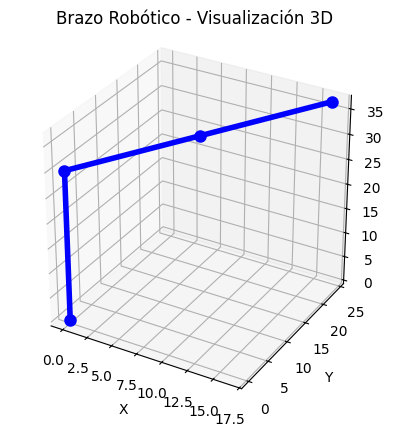

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Función para cinemática directa
def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 0, 0, d1

    x2 = x1 + np.cos(theta1) * a2 * np.cos(theta2)
    y2 = y1 + np.sin(theta1) * a2 * np.cos(theta2)
    z2 = z1 + a2 * np.sin(theta2)

    x3 = x2 + np.cos(theta1) * a3 * np.cos(theta2 + theta3)
    y3 = y2 + np.sin(theta1) * a3 * np.cos(theta2 + theta3)
    z3 = z2 + a3 * np.sin(theta2 + theta3)

    return [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]

# Cinemática inversa
def inverse_kinematics(x, y, z, d1, a2, a3):
    r = np.sqrt(x**2 + y**2)
    z_offset = z - d1

    cos_theta3 = (r**2 + z_offset**2 - a2**2 - a3**2) / (2 * a2 * a3)
    theta3 = np.arccos(np.clip(cos_theta3, -1.0, 1.0))

    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z_offset, r) - np.arctan2(k2, k1)

    theta1 = np.arctan2(y, x)

    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

# Visualización
def plot_robot(positions):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    zs = [p[2] for p in positions]

    ax.plot(xs, ys, zs, '-o', linewidth=4, markersize=8, color='blue')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Brazo Robótico - Visualización 3D")
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    plt.show()

# ================================
if __name__ == "__main__":
    print("Ingrese los tamaños de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslabón): "))
    a3 = float(input("a3 (longitud del segundo eslabón): "))

    print("\nIngrese las coordenadas cartesianas (x, y, z) del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    theta1, theta2, theta3 = inverse_kinematics(x, y, z, d1, a2, a3)

    print(f"\nÁngulos articulares calculados (en grados):")
    print(f"θ1 (base): {theta1:.2f}°")
    print(f"θ2 (hombro): {theta2:.2f}°")
    print(f"θ3 (codo): {theta3:.2f}°")

    positions = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)
    x_calc, y_calc, z_calc = positions[-1]

    print(f"\nPosición calculada del efector final: x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")

    plot_robot(positions)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 0, 0, d1

    x2 = x1 + np.cos(theta1) * a2 * np.cos(theta2)
    y2 = y1 + np.sin(theta1) * a2 * np.cos(theta2)
    z2 = z1 + a2 * np.sin(theta2)

    x3 = x2 + np.cos(theta1) * a3 * np.cos(theta2 + theta3)
    y3 = y2 + np.sin(theta1) * a3 * np.cos(theta2 + theta3)
    z3 = z2 + a3 * np.sin(theta2 + theta3)

    return [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]

def inverse_kinematics(x, y, z, d1, a2, a3):
    r = np.sqrt(x**2 + y**2)
    z_offset = z - d1

    cos_theta3 = (r**2 + z_offset**2 - a2**2 - a3**2) / (2 * a2 * a3)

    if not -1 <= cos_theta3 <= 1:
        return None

    theta3 = np.arccos(cos_theta3)

    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z_offset, r) - np.arctan2(k2, k1)

    theta1 = np.arctan2(y, x)

    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

def plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot del brazo
    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    zs = [p[2] for p in positions]
    ax.plot(xs, ys, zs, '-o', linewidth=4, markersize=8, color='blue', label='Brazo robótico')

    # Generar esfera hueca de trabajo (espacio entre alcance_min y alcance_max)
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
    for r in [alcance_min, alcance_max]:
        x = r * np.cos(u) * np.sin(v)
        y = r * np.sin(u) * np.sin(v)
        z = r * np.cos(v)
        ax.plot_wireframe(x, y, z + d1, color='gray', alpha=0.2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Brazo Robótico y su Espacio de Trabajo")
    ax.legend()
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    plt.show()

# ================================
if __name__ == "__main__":
    print("Ingrese los tamaños de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslabón): "))
    a3 = float(input("a3 (longitud del segundo eslabón): "))

    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3
    z_min = d1 - (a2 + a3)
    z_max = d1 + a2 + a3

    print(f"\nRango de movimiento permitido:")
    print(f"Distancia horizontal (r): {alcance_min:.2f} a {alcance_max:.2f}")
    print(f"Altura (z): {z_min:.2f} a {z_max:.2f}")

    print("\nIngrese las coordenadas deseadas del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    r = np.sqrt(x**2 + y**2)

    if not (alcance_min <= r <= alcance_max and z_min <= z <= z_max):
        print("\n❌ ERROR: La posición ingresada está FUERA del alcance del brazo.")
    else:
        result = inverse_kinematics(x, y, z, d1, a2, a3)
        if result is None:
            print("\n❌ ERROR: La posición está fuera del espacio de trabajo real.")
        else:
            theta1, theta2, theta3 = result
            print(f"\n✅ Ángulos articulares:")
            print(f"θ1 (base): {theta1:.2f}°")
            print(f"θ2 (hombro): {theta2:.2f}°")
            print(f"θ3 (codo): {theta3:.2f}°")

            positions = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)
            x_calc, y_calc, z_calc = positions[-1]
            print(f"\n🔍 Posición alcanzada: x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")

            plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max)


Ingrese los tamaños de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 30
a2 (longitud del primer eslabón): 15
a3 (longitud del segundo eslabón): 15

Rango de movimiento permitido:
Distancia horizontal (r): 0.00 a 30.00
Altura (z): 0.00 a 60.00

Ingrese las coordenadas deseadas del efector final:
x: 24
y: 34
z: 34

❌ ERROR: La posición ingresada está FUERA del alcance del brazo.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 0, 0, d1

    x2 = x1 + np.cos(theta1) * a2 * np.cos(theta2)
    y2 = y1 + np.sin(theta1) * a2 * np.cos(theta2)
    z2 = z1 + a2 * np.sin(theta2)

    x3 = x2 + np.cos(theta1) * a3 * np.cos(theta2 + theta3)
    y3 = y2 + np.sin(theta1) * a3 * np.cos(theta2 + theta3)
    z3 = z2 + a3 * np.sin(theta2 + theta3)

    return [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]

def inverse_kinematics(x, y, z, d1, a2, a3):
    r = np.sqrt(x**2 + y**2)
    z_offset = z - d1

    cos_theta3 = (r**2 + z_offset**2 - a2**2 - a3**2) / (2 * a2 * a3)

    if not -1 <= cos_theta3 <= 1:
        return None

    theta3 = np.arccos(cos_theta3)

    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z_offset, r) - np.arctan2(k2, k1)

    theta1 = np.arctan2(y, x)

    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

def plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max, d1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    zs = [p[2] for p in positions]
    ax.plot(xs, ys, zs, '-o', linewidth=4, markersize=8, color='blue', label='Brazo robótico')

    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
    for r in [alcance_min, alcance_max]:
        x = r * np.cos(u) * np.sin(v)
        y = r * np.sin(u) * np.sin(v)
        z = r * np.cos(v)
        ax.plot_wireframe(x, y, z + d1, color='gray', alpha=0.2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Brazo Robótico y su Espacio de Trabajo")
    ax.legend()
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    plt.show()

# ================================
if __name__ == "__main__":
    print("Ingrese los tamaños de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslabón): "))
    a3 = float(input("a3 (longitud del segundo eslabón): "))

    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3
    z_min = d1 - (a2 + a3)
    z_max = d1 + a2 + a3

    print(f"\nRango de movimiento permitido:")
    print(f"Distancia horizontal (r): {alcance_min:.2f} a {alcance_max:.2f}")
    print(f"Altura (z): {z_min:.2f} a {z_max:.2f}")

    print("\nIngrese las coordenadas deseadas del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    r = np.sqrt(x**2 + y**2)
    epsilon = 1e-6  # Tolerancia numérica

    if not (alcance_min - epsilon <= r <= alcance_max + epsilon and z_min - epsilon <= z <= z_max + epsilon):
        print("\n❌ ERROR: La posición ingresada está FUERA del alcance del brazo.")
    else:
        result = inverse_kinematics(x, y, z, d1, a2, a3)
        if result is None:
            print("\n❌ ERROR: La posición está fuera del espacio de trabajo real (por ángulos imposibles).")
        else:
            theta1, theta2, theta3 = result
            print(f"\n✅ Ángulos articulares:")
            print(f"θ1 (base): {theta1:.2f}°")
            print(f"θ2 (hombro): {theta2:.2f}°")
            print(f"θ3 (codo): {theta3:.2f}°")

            positions = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)
            x_calc, y_calc, z_calc = positions[-1]
            print(f"\n🔍 Posición alcanzada: x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")

            plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max, d1)
11

Ingrese los tamaños de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 30
a2 (longitud del primer eslabón): 15
a3 (longitud del segundo eslabón): 15

Rango de movimiento permitido:
Distancia horizontal (r): 0.00 a 30.00
Altura (z): 0.00 a 60.00

Ingrese las coordenadas deseadas del efector final:
x: 30
y: 30
z: 30

❌ ERROR: La posición ingresada está FUERA del alcance del brazo.


11

In [13]:
import numpy as np

def calcular_espacio_trabajo(a1, a2, a3):
    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3

    x_min = -alcance_max
    x_max = alcance_max
    y_min = -alcance_max
    y_max = alcance_max
    z_min = -alcance_max
    z_max = alcance_max

    return x_min, x_max, y_min, y_max, z_min, z_max, alcance_min, alcance_max

if __name__ == "__main__":
    print("=== Robot RRR tipo codo (sin offset) ===")
    print("Ingrese las longitudes de los eslabones del robot:")

    a1 = float(input("a1 (base, solo para visualización): "))
    a2 = float(input("a2 (primer eslabón): "))
    a3 = float(input("a3 (segundo eslabón): "))

    x_min, x_max, y_min, y_max, z_min, z_max, r_min, r_max = calcular_espacio_trabajo(a1, a2, a3)

    print("\n=== Espacio de trabajo (rango cartesiano del efector final) ===")
    print(f"Coordenadas X: de {x_min:.2f} a {x_max:.2f}")
    print(f"Coordenadas Y: de {y_min:.2f} a {y_max:.2f}")
    print(f"Coordenadas Z: de {z_min:.2f} a {z_max:.2f}")
    print(f"\nAlcance radial desde el eje central: de {r_min:.2f} a {r_max:.2f}")


=== Robot RRR tipo codo (sin offset) ===
Ingrese las longitudes de los eslabones del robot:
a1 (base, solo para visualización): 30
a2 (primer eslabón): 15
a3 (segundo eslabón): 15

=== Espacio de trabajo (rango cartesiano del efector final) ===
Coordenadas X: de -30.00 a 30.00
Coordenadas Y: de -30.00 a 30.00
Coordenadas Z: de -30.00 a 30.00

Alcance radial desde el eje central: de 0.00 a 30.00


In [18]:
import numpy as np

def calcular_espacio_trabajo(a1, a2, a3):
    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3

    return alcance_min, alcance_max

if __name__ == "__main__":
    print("=== Robot RRR tipo codo (sin offset) ===")
    print("Ingrese las longitudes de los eslabones del robot:")

    a1 = float(input("a1 (base, solo para visualización): "))
    a2 = float(input("a2 (primer eslabón): "))
    a3 = float(input("a3 (segundo eslabón): "))

    alcance_min, alcance_max = calcular_espacio_trabajo(a1, a2, a3)

    print("\n=== Espacio de trabajo (rango cartesiano del efector final) ===")
    print(f"Alcance radial mínimo: {alcance_min:.2f}")
    print(f"Alcance radial máximo: {alcance_max:.2f}")

    # Solicitar coordenadas del efector final
    print("\nIngrese las coordenadas deseadas del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    # Calcular la distancia total desde el origen (0, 0, 0)
    distancia = np.sqrt(x**2 + y**2 + z**2)

    if distancia >= alcance_min and distancia <= alcance_max:
        print(f"\n✅ La posición ({x}, {y}, {z}) está dentro del alcance del robot.")
    else:
        print(f"\n❌ ERROR: La posición ({x}, {y}, {z}) está fuera  alcance del robot.")


=== Robot RRR tipo codo (sin offset) ===
Ingrese las longitudes de los eslabones del robot:
a1 (base, solo para visualización): 30
a2 (primer eslabón): 15
a3 (segundo eslabón): 15

=== Espacio de trabajo (rango cartesiano del efector final) ===
Alcance radial mínimo: 0.00
Alcance radial máximo: 30.00

Ingrese las coordenadas deseadas del efector final:
x: 30
y: 30
z: 30

❌ ERROR: La posición (30.0, 30.0, 30.0) está fuera  alcance del robot.


Ingrese los tamaños de los eslabones y el desplazamiento de la base:
d1 (desplazamiento de la base): 30
a2 (longitud del primer eslabón): 15
a3 (longitud del segundo eslabón): 15

Rango de movimiento permitido:
Distancia horizontal (r): 0.00 a 30.00
Altura (z): 0.00 a 60.00

Ingrese las coordenadas deseadas del efector final:
x: 10
y: 12
z: 23

✅ Ángulos articulares:
θ1 (base): 50.19°
θ2 (hombro): -79.35°
θ3 (codo): 110.42°

🔍 Posición alcanzada: x = 10.00, y = 12.00, z = 23.00


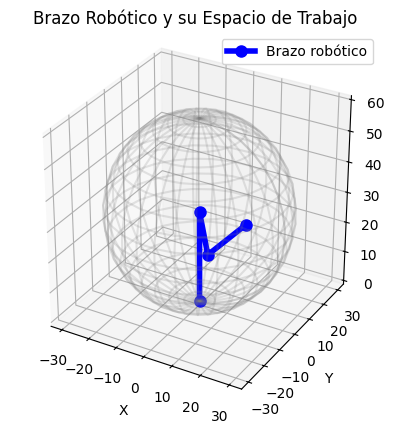

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1_deg, theta2_deg, theta3_deg, d1, a2, a3):
    theta1 = np.radians(theta1_deg)
    theta2 = np.radians(theta2_deg)
    theta3 = np.radians(theta3_deg)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 0, 0, d1

    x2 = x1 + np.cos(theta1) * a2 * np.cos(theta2)
    y2 = y1 + np.sin(theta1) * a2 * np.cos(theta2)
    z2 = z1 + a2 * np.sin(theta2)

    x3 = x2 + np.cos(theta1) * a3 * np.cos(theta2 + theta3)
    y3 = y2 + np.sin(theta1) * a3 * np.cos(theta2 + theta3)
    z3 = z2 + a3 * np.sin(theta2 + theta3)

    return [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]

def inverse_kinematics(x, y, z, d1, a2, a3):
    r = np.sqrt(x**2 + y**2)
    z_offset = z - d1

    cos_theta3 = (r**2 + z_offset**2 - a2**2 - a3**2) / (2 * a2 * a3)

    if not -1 <= cos_theta3 <= 1:
        return None

    theta3 = np.arccos(cos_theta3)

    k1 = a2 + a3 * np.cos(theta3)
    k2 = a3 * np.sin(theta3)
    theta2 = np.arctan2(z_offset, r) - np.arctan2(k2, k1)

    theta1 = np.arctan2(y, x)

    return np.degrees(theta1), np.degrees(theta2), np.degrees(theta3)

def plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot del brazo
    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    zs = [p[2] for p in positions]
    ax.plot(xs, ys, zs, '-o', linewidth=4, markersize=8, color='blue', label='Brazo robótico')

    # Generar esfera hueca de trabajo (espacio entre alcance_min y alcance_max)
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
    for r in [alcance_min, alcance_max]:
        x = r * np.cos(u) * np.sin(v)
        y = r * np.sin(u) * np.sin(v)
        z = r * np.cos(v)
        ax.plot_wireframe(x, y, z + d1, color='gray', alpha=0.2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Brazo Robótico y su Espacio de Trabajo")
    ax.legend()
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    plt.show()

# ================================
if __name__ == "__main__":
    print("Ingrese los tamaños de los eslabones y el desplazamiento de la base:")
    d1 = float(input("d1 (desplazamiento de la base): "))
    a2 = float(input("a2 (longitud del primer eslabón): "))
    a3 = float(input("a3 (longitud del segundo eslabón): "))

    alcance_min = abs(a2 - a3)
    alcance_max = a2 + a3
    z_min = d1 - (a2 + a3)
    z_max = d1 + a2 + a3

    print(f"\nRango de movimiento permitido:")
    print(f"Distancia horizontal (r): {alcance_min:.2f} a {alcance_max:.2f}")
    print(f"Altura (z): {z_min:.2f} a {z_max:.2f}")

    print("\nIngrese las coordenadas deseadas del efector final:")
    x = float(input("x: "))
    y = float(input("y: "))
    z = float(input("z: "))

    r = np.sqrt(x**2 + y**2)

    if not (alcance_min <= r <= alcance_max and z_min <= z <= z_max):
        print("\n❌ ERROR: La posición ingresada está FUERA del alcance del brazo.")
    else:
        result = inverse_kinematics(x, y, z, d1, a2, a3)
        if result is None:
            print("\n❌ ERROR: La posición está fuera del espacio de trabajo real.")
        else:
            theta1, theta2, theta3 = result
            print(f"\n✅ Ángulos articulares:")
            print(f"θ1 (base): {theta1:.2f}°")
            print(f"θ2 (hombro): {theta2:.2f}°")
            print(f"θ3 (codo): {theta3:.2f}°")

            positions = forward_kinematics(theta1, theta2, theta3, d1, a2, a3)
            x_calc, y_calc, z_calc = positions[-1]
            print(f"\n🔍 Posición alcanzada: x = {x_calc:.2f}, y = {y_calc:.2f}, z = {z_calc:.2f}")

            plot_robot_and_workspace(positions, alcance_min, alcance_max, z_min, z_max)
